<a href="https://colab.research.google.com/github/syifnrl/PA_Orbit/blob/main/RPM%20Signal%20Processing/Python_Signal_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy
from scipy import signal
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
rpm = pd.read_csv('/content/record_rpm_new2.csv', delimiter='\t')
rpm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PWM       236 non-null    int64  
 1   RPM B     236 non-null    float64
 2   RPM D     236 non-null    float64
 3   Interval  236 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 7.5 KB


In [ ]:
rpm.head(100)

,PWM,RPM B,RPM D,Interval
0,1,0.000000,0.000000,0.000
1,1,108.279228,110.960419,0.029
2,1,224.054703,246.839935,0.070
3,1,284.861725,274.784058,0.111
4,1,291.271118,301.835358,0.152
...,...,...,...,...
95,1,298.739594,308.223389,4.017
96,1,309.862854,308.223389,4.059
97,1,304.995911,309.862854,4.102
98,1,289.821991,306.601196,4.145


In [ ]:
df = pd.DataFrame(rpm)

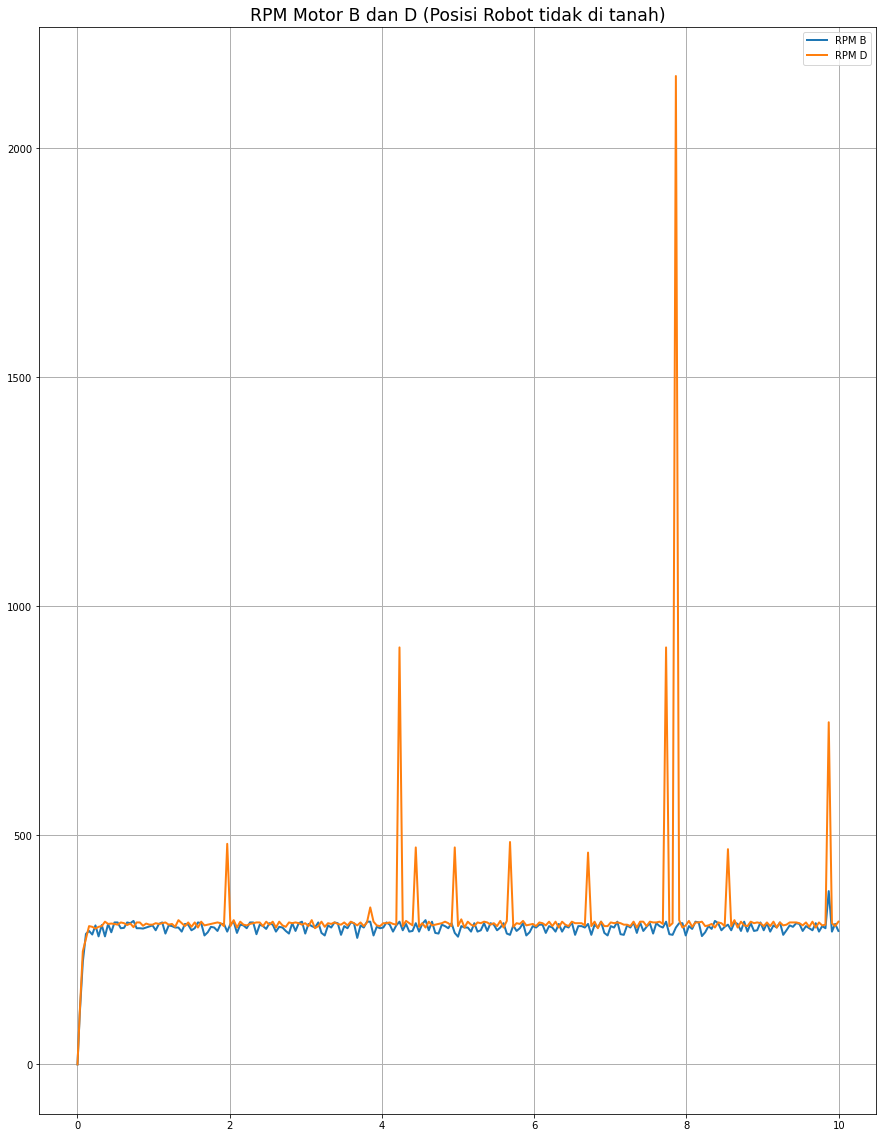

In [ ]:
x = rpm['Interval']
y1 = rpm['RPM B']
y2 = rpm['RPM D']

plt_1 = plt.figure(figsize=(15, 20))
plt.grid(visible=True, which='major', axis='both', linestyle='-', linewidth=1)
plt.plot(x, y1, linewidth=2, label="RPM B")
plt.plot(x, y2, linewidth=2, label="RPM D")
plt.legend()
plt.title("RPM Motor B dan D (Posisi Robot tidak di tanah)", fontsize='xx-large')
plt.show()

In [ ]:
print(df.max()['RPM B'])
print(df.max()['RPM D'])

378.27417
2157.563721


In [ ]:
import numpy as np
from scipy.fftpack import fft

Text(0.5, 1.0, 'Sinyal Frekuensi RPM B (Posisi Robot tidak di tanah)')

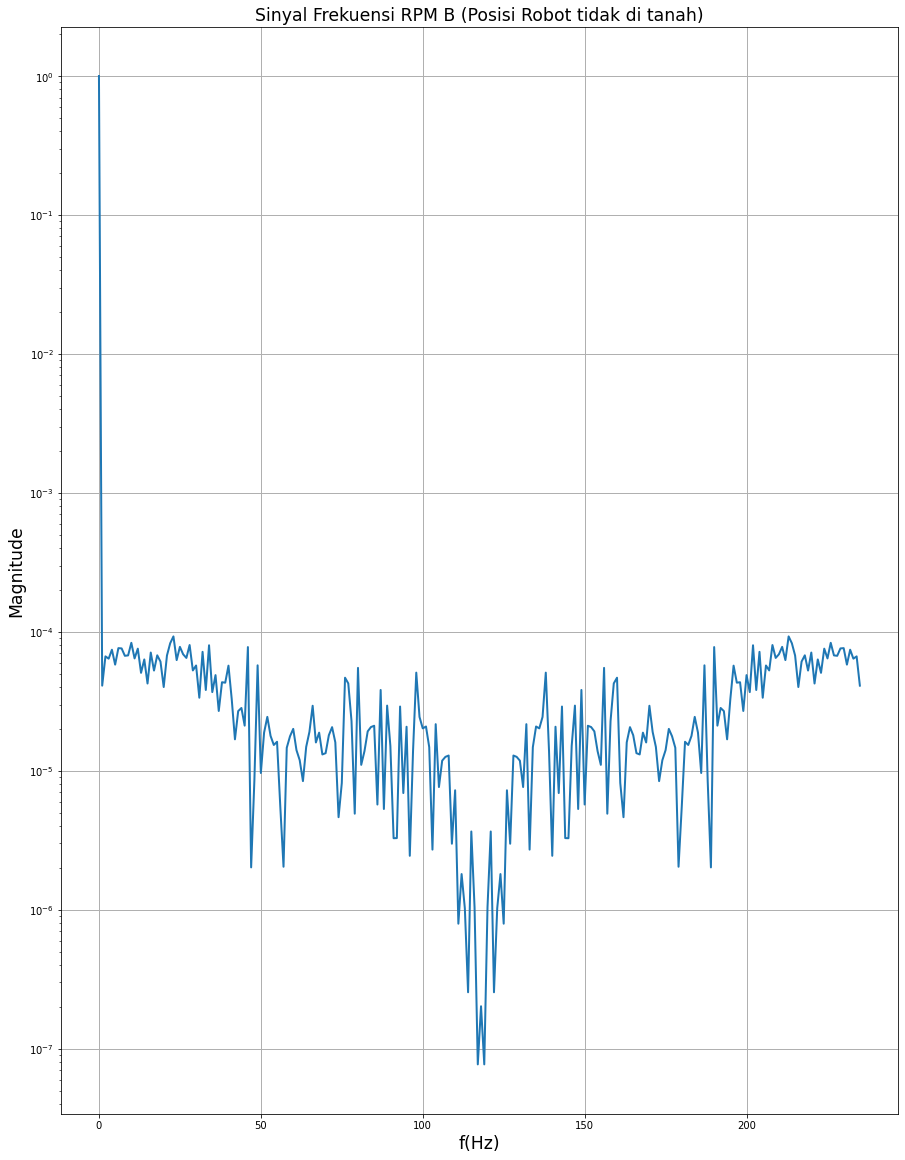

In [ ]:
f=abs(np.fft.fft(y1))

# get the list of frequencies
num=np.size(x)
freq = [i for i in list(range(num))]

# get the list of spectrums
spectrum=f.real*f.real+f.imag*f.imag
nspectrum=spectrum/spectrum[0]
plt.figure(figsize=(15, 20))
plt.grid(visible=True, which='major', axis='both', linestyle='-', linewidth=1)
# plot nspectrum per frequency, with a semilog scale on nspectrum
plt.semilogy(freq,nspectrum, linewidth=2)
plt.xlabel("f(Hz)", fontsize='xx-large')
plt.ylabel("Magnitude", fontsize='xx-large')
plt.title("Sinyal Frekuensi RPM B (Posisi Robot tidak di tanah)", fontsize='xx-large')

Text(0.5, 1.0, 'Sinyal Frekuensi RPM D (Posisi Robot tidak di tanah)')

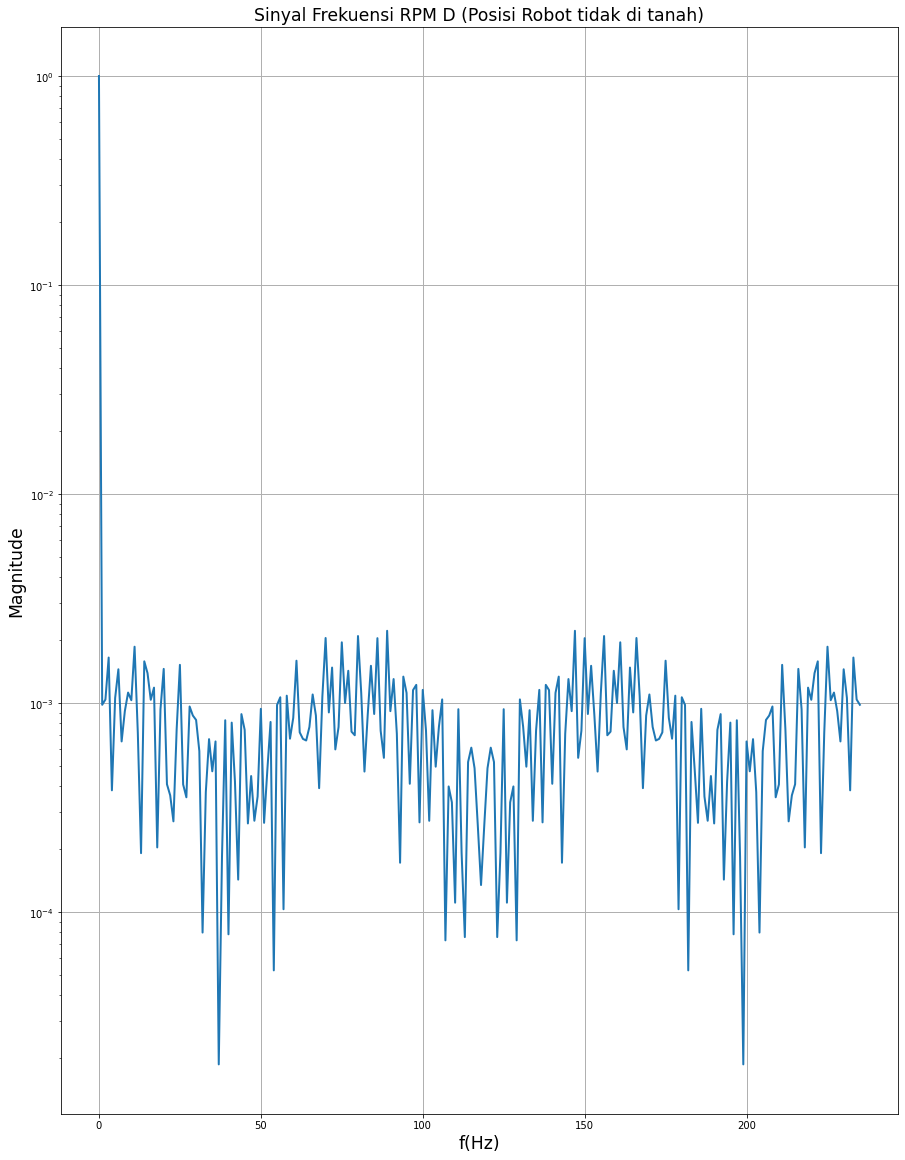

In [ ]:
f=abs(np.fft.fft(y2))

# get the list of frequencies
num=np.size(x)
freq = [i for i in list(range(num))]

# get the list of spectrums
spectrum=f.real*f.real+f.imag*f.imag
nspectrum=spectrum/spectrum[0]
plt.figure(figsize=(15, 20))
plt.grid(visible=True, which='major', axis='both', linestyle='-', linewidth=1)
# plot nspectrum per frequency, with a semilog scale on nspectrum
plt.semilogy(freq,nspectrum, linewidth=2)
plt.xlabel("f(Hz)", fontsize='xx-large')
plt.ylabel("Magnitude", fontsize='xx-large')
plt.title("Sinyal Frekuensi RPM D (Posisi Robot tidak di tanah)", fontsize='xx-large')

In [ ]:
#butterworth motor b
from scipy.signal import butter, lfilter
b1, a1 = butter(2, 35, btype='low', fs=1000)

print(b1)
print(a1)


[0.01043241 0.02086483 0.01043241]
[ 1.         -1.69099638  0.73272603]


Text(0.5, 0, 'Waktu (detik)')

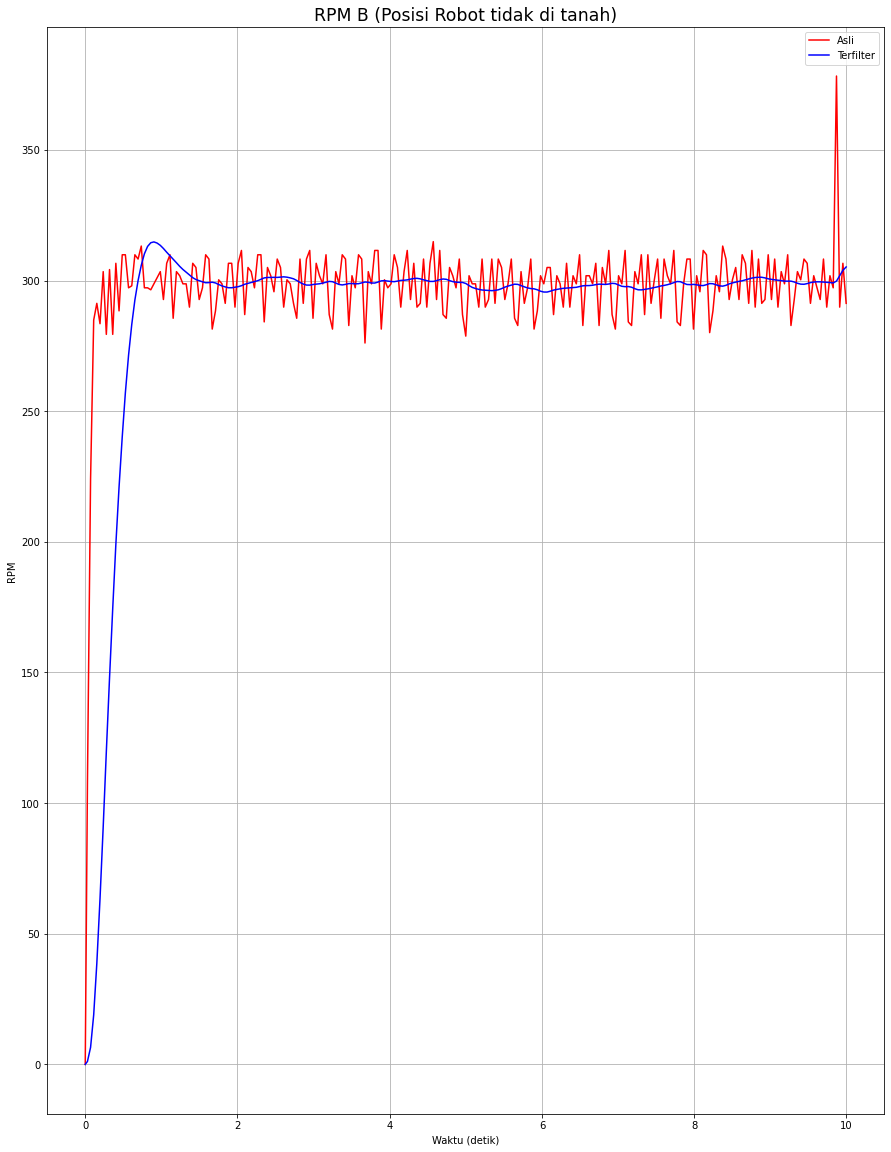

In [ ]:
plt.figure(figsize=(15, 20))
butter_b = lfilter(b1, a1, y1)
plt.grid(visible=True)
plt.plot(df['Interval'], y1, color='r', label="Asli")
plt.plot(df['Interval'], butter_b, color='b', label="Terfilter")
plt.legend()
plt.title("RPM B (Posisi Robot tidak di tanah)", fontsize='xx-large')
plt.ylabel("RPM")
plt.xlabel("Waktu (detik)")

In [ ]:
print("Sinyal Hasil Filter")
print("Rata - rata: " + str(butter_b.mean()))
print("Nilai tertinggi: " + str(butter_b.max()))

print("\n")
print("Sinyal Asli")
print("Rata - rata: " + str(df['RPM B'].mean()))
print("Nilai tertinggi: " + str(df['RPM B'].max()))

Sinyal Hasil Filter
Rata - rata: 288.3379572870596
Nilai tertinggi: 314.78141700926034


Sinyal Asli
Rata - rata: 296.6748459957622
Nilai tertinggi: 378.27417


Text(0.5, 1.0, 'Frekuensi RPM B (Posisi Robot tidak di tanah)')

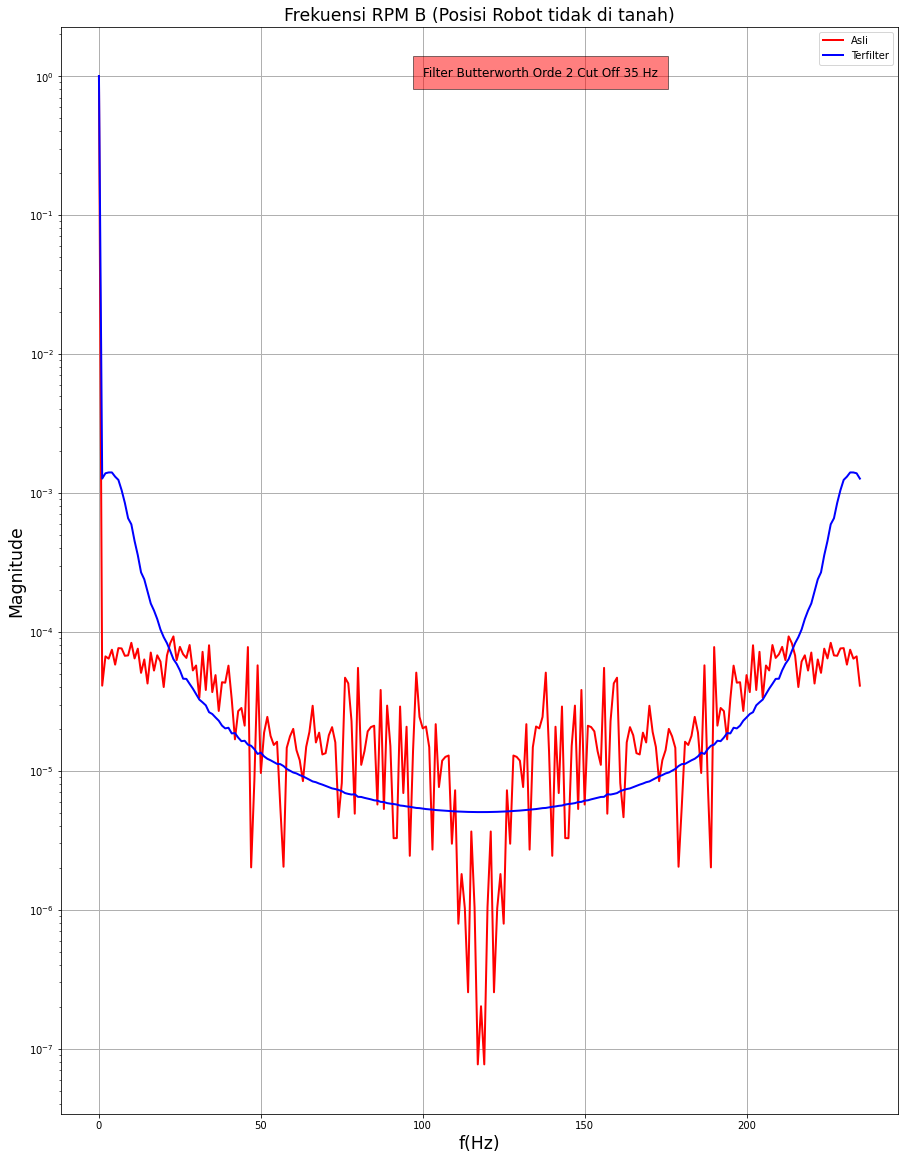

In [ ]:
f=abs(np.fft.fft(y1))
f2 = abs(np.fft.fft(butter_b))

# get the list of frequencies
num=np.size(x)
freq = [i for i in list(range(num))]

# get the list of spectrums
spectrum=f.real*f.real+f.imag*f.imag
spectrum2=f2.real*f2.real+f2.imag*f2.imag
nspectrum=spectrum/spectrum[0]
nspectrum2 = spectrum2/spectrum2[0]
plt.figure(figsize=(15, 20))
plt.grid(visible=True, which='major', axis='both', linestyle='-', linewidth=1)
# plot nspectrum per frequency, with a semilog scale on nspectrum
plt.text(100, 1, "Filter Butterworth Orde 2 Cut Off 35 Hz", bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10}, fontsize='large')
plt.semilogy(freq,nspectrum, linewidth=2, color='r', label="Asli")
plt.semilogy(freq,nspectrum2, linewidth=2, color='b', label="Terfilter")
plt.legend()
plt.xlabel("f(Hz)", fontsize='xx-large')
plt.ylabel("Magnitude", fontsize='xx-large')
plt.title("Frekuensi RPM B (Posisi Robot tidak di tanah)", fontsize='xx-large')

In [ ]:
b2, a2 = butter(2, 10, btype='low', fs=1000)
butter_d = lfilter(b2, a2, y2)

print(b2)
print(a2)

[0.00094469 0.00188938 0.00094469]
[ 1.         -1.91119707  0.91497583]


Text(0.5, 1.0, 'RPM Motor D (Posisi Robot tidak di tanah)')

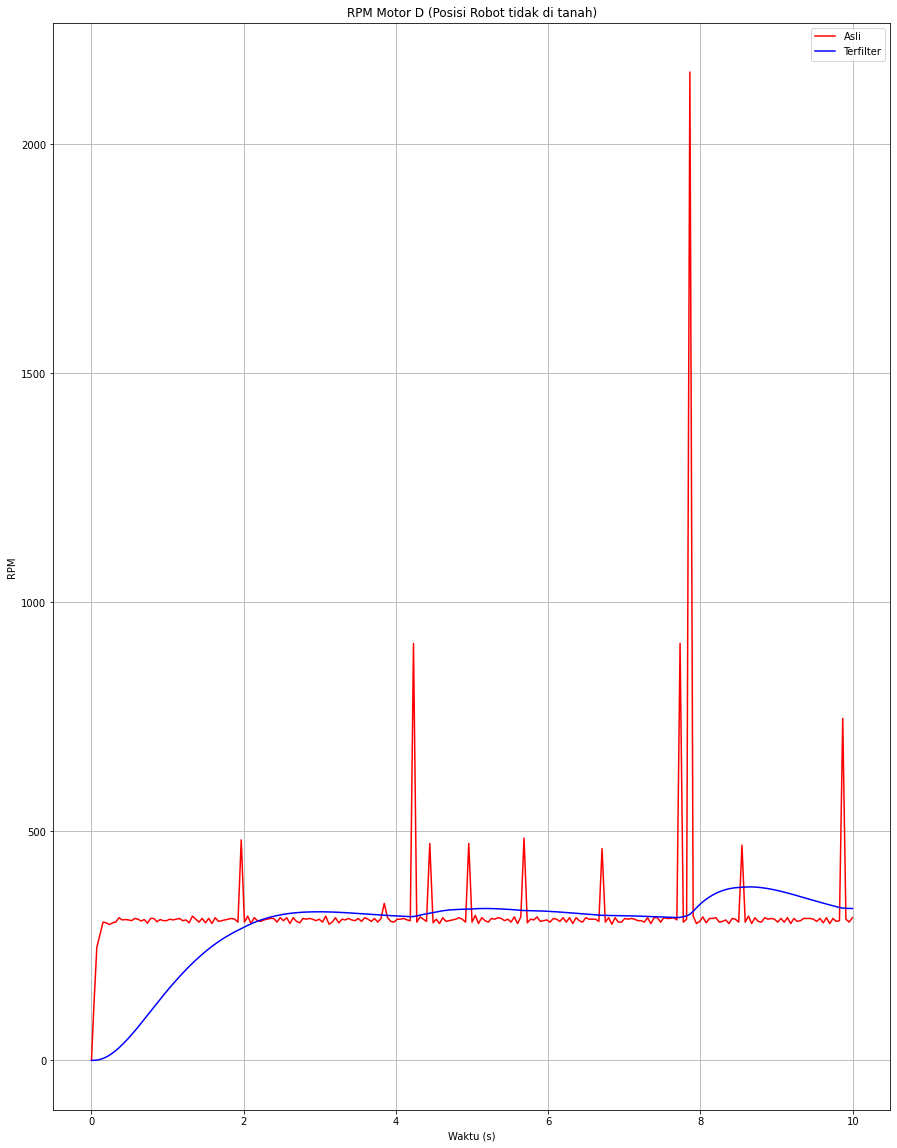

In [ ]:
plt.figure(figsize=(15, 20))
plt.grid(visible=True)
plt.plot(df['Interval'], y2, color='r', label="Asli")
plt.plot(df['Interval'], butter_d, color='b', label="Terfilter")
plt.legend()
plt.xlabel("Waktu (s)")
plt.ylabel("RPM")
plt.title("RPM Motor D (Posisi Robot tidak di tanah)")

In [ ]:
print("Sinyal Hasil Filter")
print("Rata - rata: " + str(butter_d.mean()))
print("Nilai tertinggi: " + str(butter_d.max()))

print("\n")
print("Sinyal Asli")
print("Rata - rata: " + str(df['RPM D'].mean()))
print("Nilai tertinggi: " + str(df['RPM D'].max()))

Sinyal Hasil Filter
Rata - rata: 291.8687710235545
Nilai tertinggi: 378.6852712291659


Sinyal Asli
Rata - rata: 323.15123007627096
Nilai tertinggi: 2157.563721


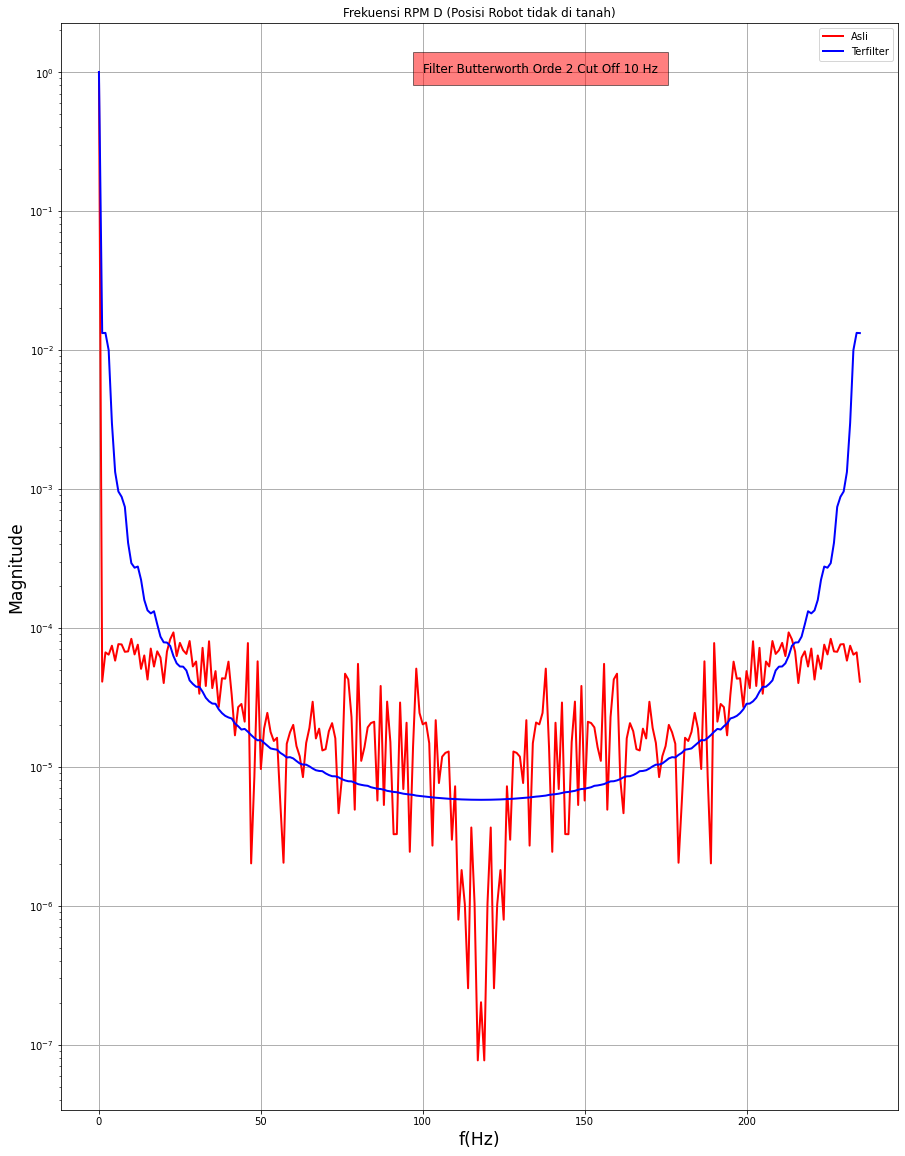

In [ ]:
f=abs(np.fft.fft(y1))
f2 = abs(np.fft.fft(butter_d))

# get the list of frequencies
num=np.size(x)
freq = [i for i in list(range(num))]

# get the list of spectrums
spectrum=f.real*f.real+f.imag*f.imag
spectrum2=f2.real*f2.real+f2.imag*f2.imag
nspectrum=spectrum/spectrum[0]
nspectrum2 = spectrum2/spectrum2[0]
plt.figure(figsize=(15, 20))
plt.grid(visible=True, which='major', axis='both', linestyle='-', linewidth=1)
# plot nspectrum per frequency, with a semilog scale on nspectrum
plt.text(100, 1, "Filter Butterworth Orde 2 Cut Off 10 Hz", bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10}, fontsize='large')
plt.semilogy(freq,nspectrum, linewidth=2, color='r', label="Asli")
plt.semilogy(freq,nspectrum2, linewidth=2, color='b', label="Terfilter")
plt.xlabel("f(Hz)", fontsize='xx-large')
plt.ylabel("Magnitude", fontsize='xx-large')
plt.title("Frekuensi RPM D (Posisi Robot tidak di tanah)")
plt.legend()

In [ ]:
rpm2 = pd.read_csv('/content/data_rpm_horizontal.csv', delimiter='\t')
rpm2.head()

,PWM,RPM A,RPM C,Interval
0,1.0,323.207794,0.006215,0.000032
1,1.0,609.312988,9.922978,0.033457
2,1.0,548.291077,36.556698,0.072008
3,1.0,505.917511,70.557617,0.111582
4,1.0,474.002777,102.863907,0.152217


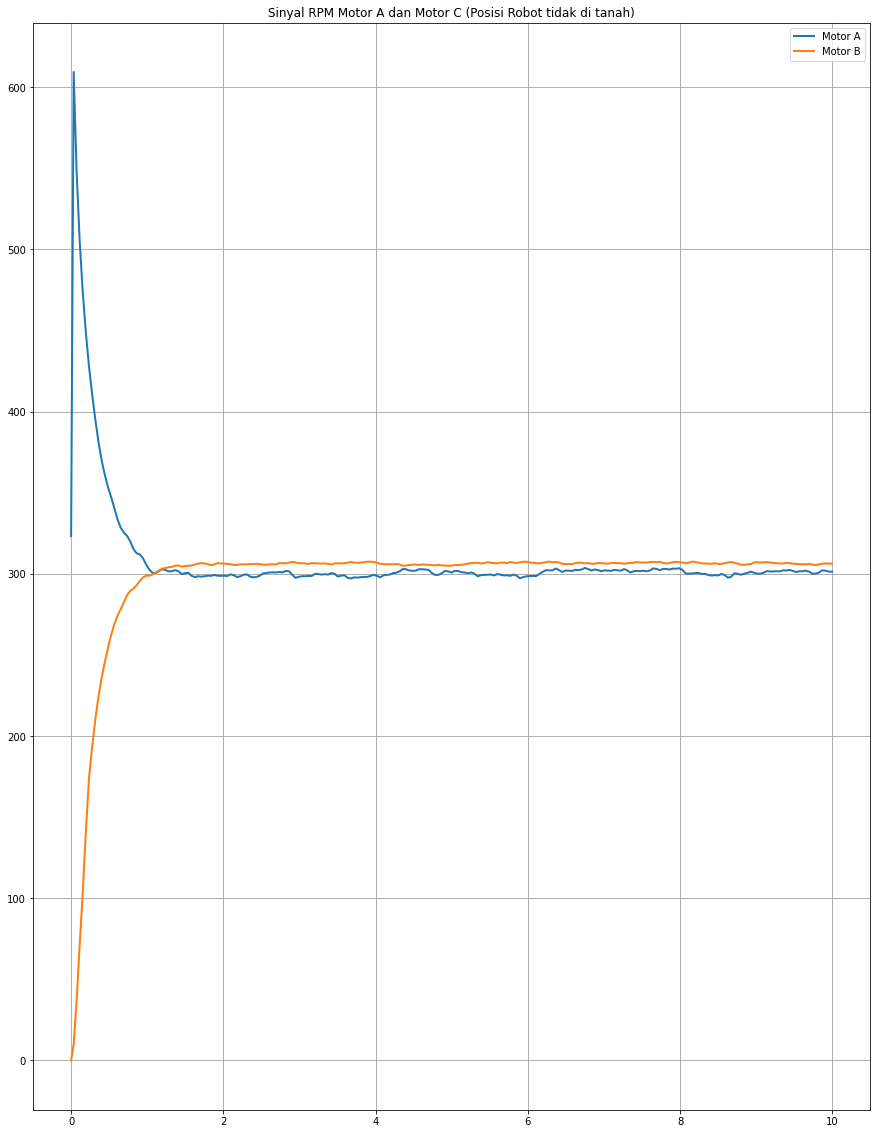

In [ ]:
df = pd.DataFrame(rpm2)

plt.figure(figsize=(15, 20))
plt.grid(visible=True, which='major', axis='both', linestyle='-', linewidth=1)
plt.plot(df['Interval'], df['RPM A'], linewidth=2, label="Motor A")
plt.plot(df['Interval'], df['RPM C'], linewidth=2, label="Motor B")
plt.legend()
plt.title("Sinyal RPM Motor A dan Motor C (Posisi Robot tidak di tanah)")
plt.show()

Text(0.5, 1.0, 'Sinyal Frekuensi RPM A (Posisi Robot tidak di tanah)')

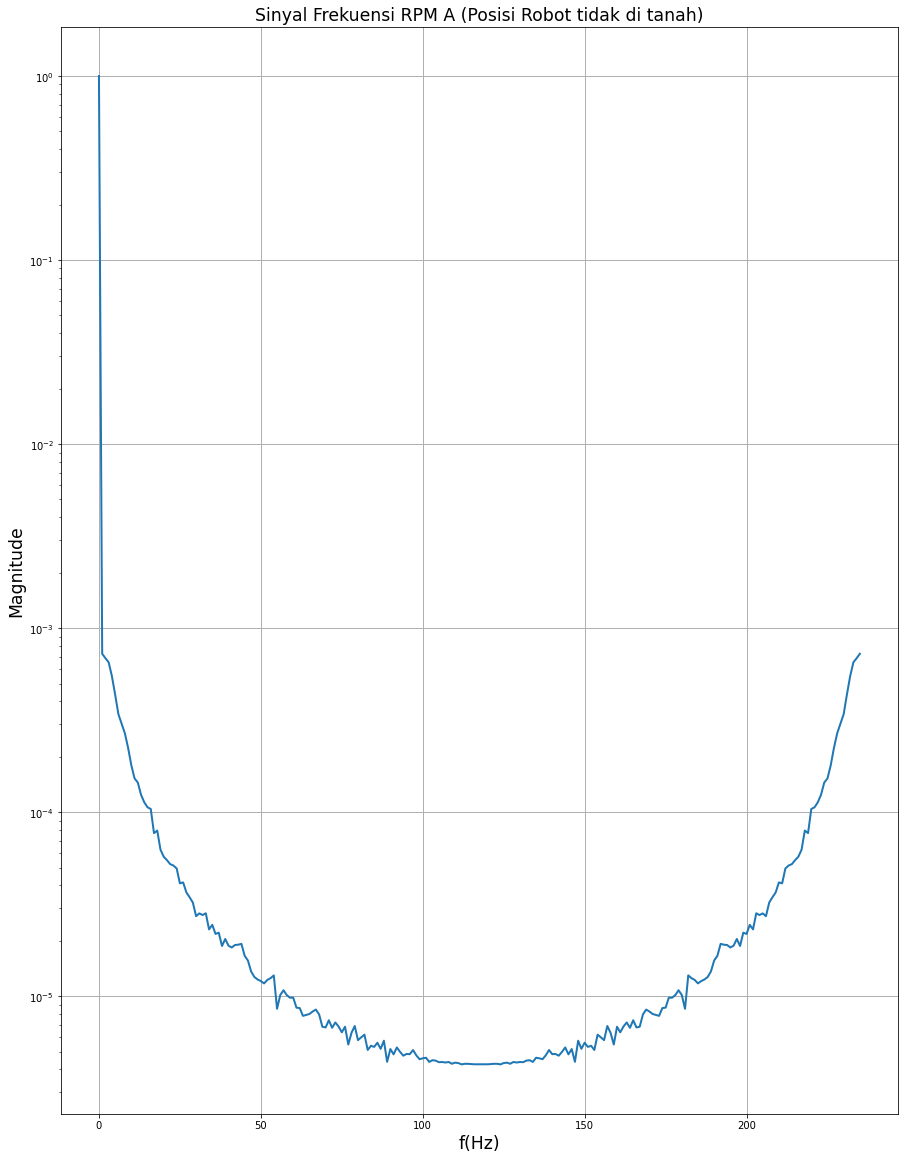

In [ ]:
f=abs(np.fft.fft(df['RPM A']))

# get the list of frequencies
num=np.size(df['Interval'])
freq = [i for i in list(range(num))]

# get the list of spectrums
spectrum=f.real*f.real+f.imag*f.imag
nspectrum=spectrum/spectrum[0]
plt.figure(figsize=(15, 20))
plt.grid(visible=True, which='major', axis='both', linestyle='-', linewidth=1)
# plot nspectrum per frequency, with a semilog scale on nspectrum
plt.semilogy(freq,nspectrum, linewidth=2)
plt.xlabel("f(Hz)", fontsize='xx-large')
plt.ylabel("Magnitude", fontsize='xx-large')
plt.title("Sinyal Frekuensi RPM A (Posisi Robot tidak di tanah)", fontsize='xx-large')

Text(0.5, 1.0, 'Sinyal Frekuensi RPM C (Posisi Robot tidak di tanah)')

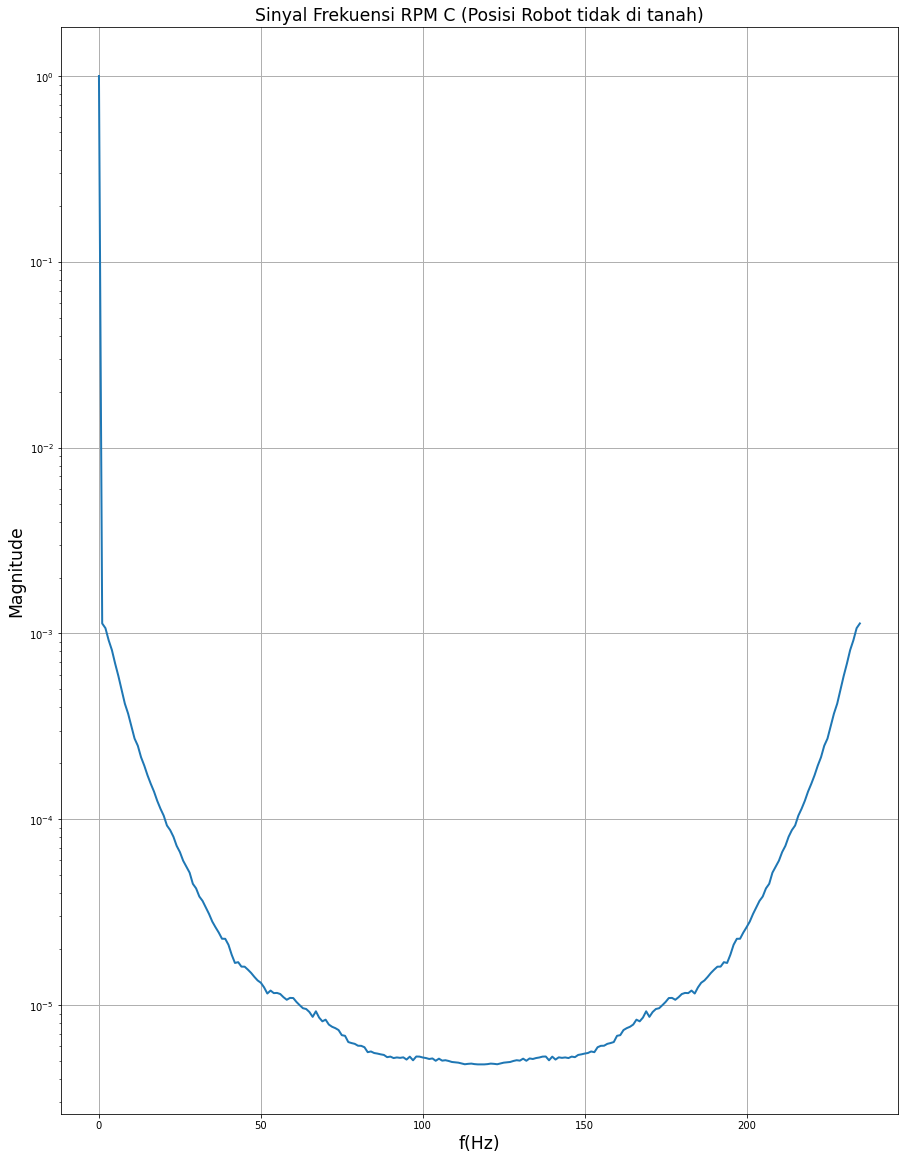

In [ ]:
f=abs(np.fft.fft(df['RPM C']))

# get the list of frequencies
num=np.size(df['Interval'])
freq = [i for i in list(range(num))]

# get the list of spectrums
spectrum=f.real*f.real+f.imag*f.imag
nspectrum=spectrum/spectrum[0]
plt.figure(figsize=(15, 20))
plt.grid(visible=True, which='major', axis='both', linestyle='-', linewidth=1)
# plot nspectrum per frequency, with a semilog scale on nspectrum
plt.semilogy(freq,nspectrum, linewidth=2)
plt.xlabel("f(Hz)", fontsize='xx-large')
plt.ylabel("Magnitude", fontsize='xx-large')
plt.title("Sinyal Frekuensi RPM C (Posisi Robot tidak di tanah)", fontsize='xx-large')

In [ ]:
##SINYAL MOTOR SAAT ROBOT DI LAPANGAN

In [ ]:
df_turun1 = pd.read_csv('/content/rpm_vertikal_turun.csv', delimiter=';')
df_turun2 = pd.read_csv('/content/rpm_horizontal_turun.csv', delimiter=';')
df_turun1.head()
df_turun2.head()

,PWM,RPM A,RPM C,Waktu
0,1.0,0.000000,0.000000,23
1,1.0,0.000000,0.000000,14687
2,1.0,51.804558,68.817749,31871
3,1.0,70.998436,87.930901,50096
4,1.0,110.960419,102.021400,68321


Text(0.5, 1.0, 'RPM Motor B dan D (Posisi Robot jalan di lapangan)')

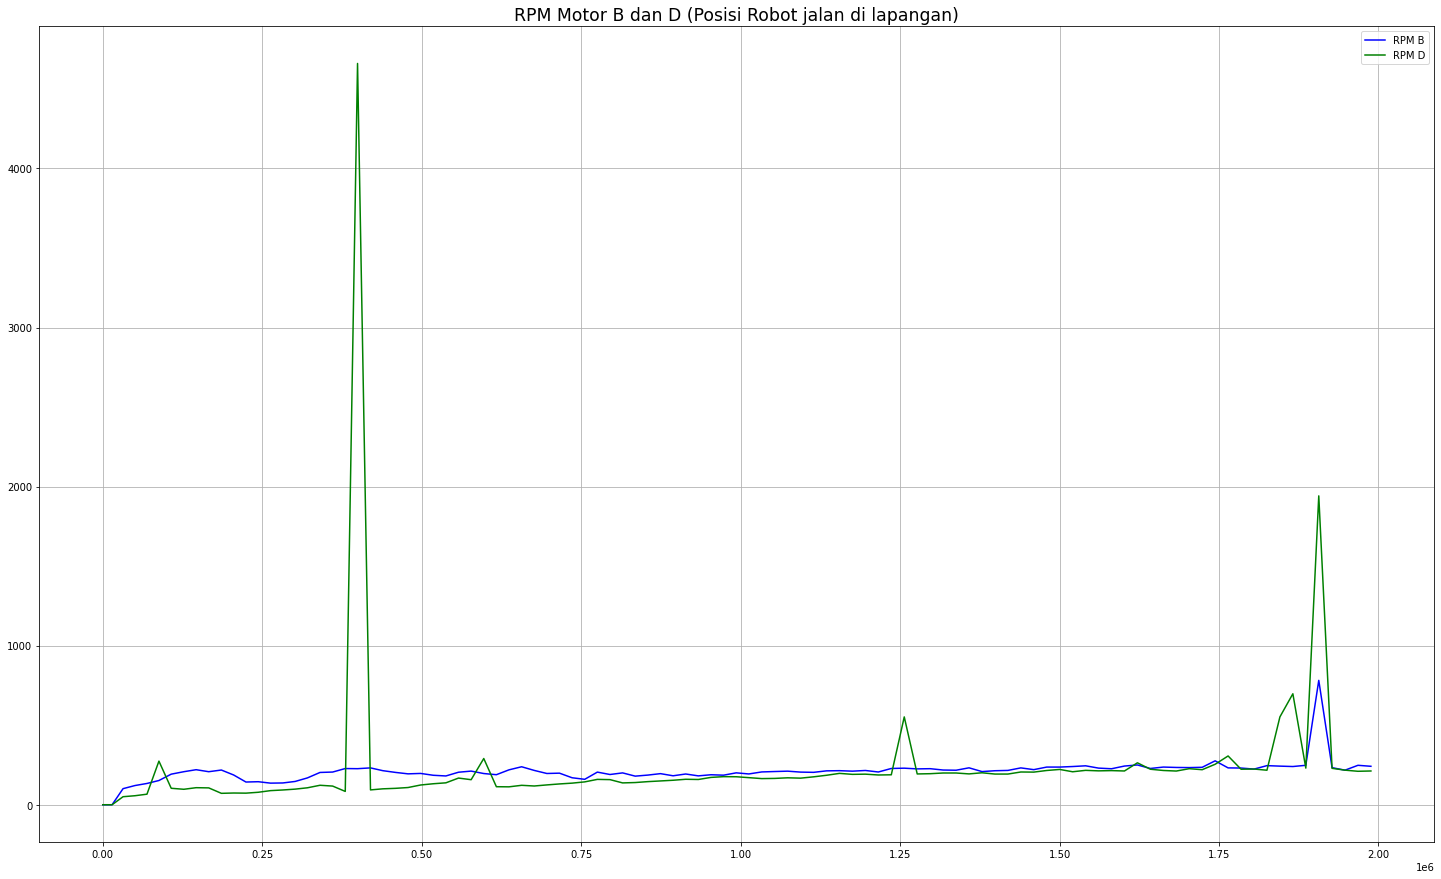

In [ ]:
plt.figure(figsize=(25, 15))
plt.grid(visible=True)
plt.plot(df_turun1['Waktu'], df_turun1['RPM B'], color="blue", label="RPM B")
plt.plot(df_turun1['Waktu'], df_turun1['RPM D'], color="green", label="RPM D")
plt.legend()
plt.title("RPM Motor B dan D (Posisi Robot jalan di lapangan)", fontsize='xx-large')

Text(0.5, 1.0, 'RPM Motor A dan C (Posisi Robot jalan di lapangan)')

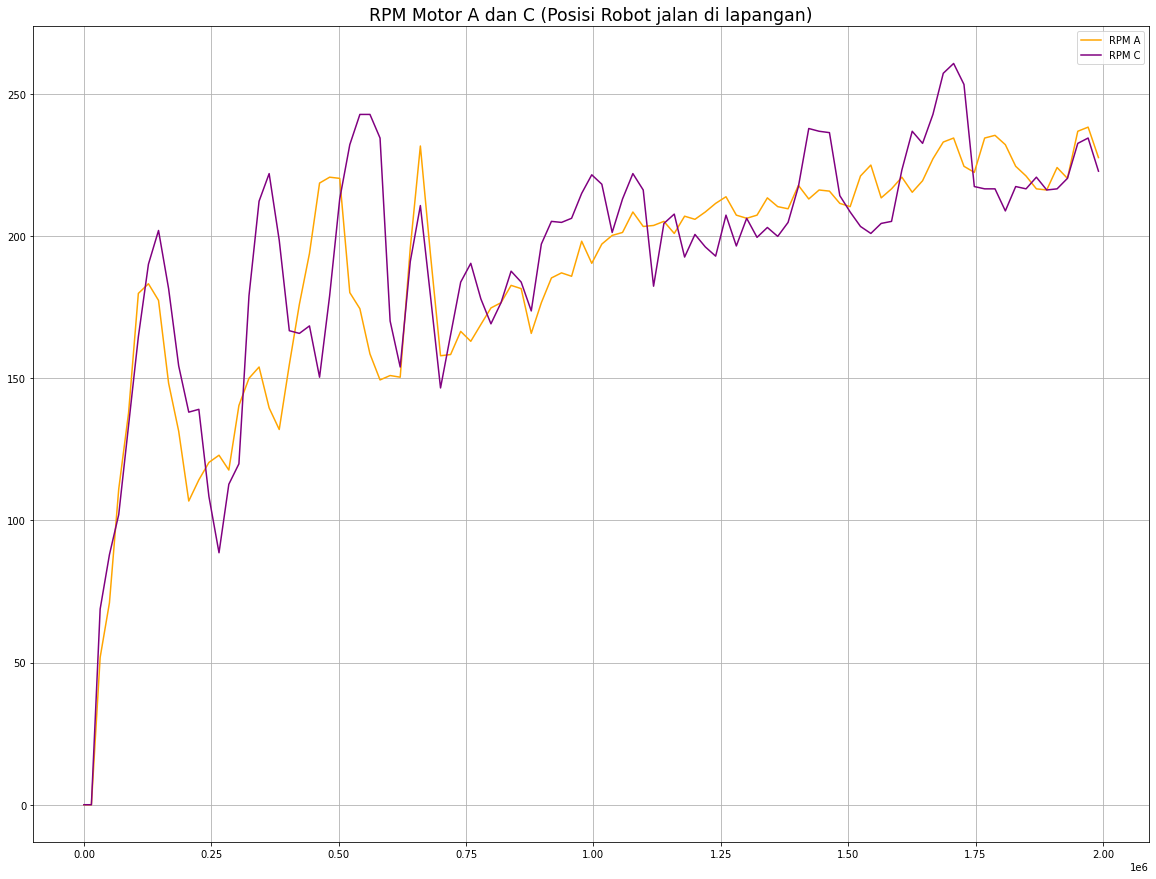

In [ ]:
plt.figure(figsize=(20, 15))
plt.grid(visible=True)
plt.plot(df_turun2['Waktu'], df_turun2['RPM A'], color="orange", label="RPM A")
plt.plot(df_turun2['Waktu'], df_turun2['RPM C'], color="purple", label="RPM C")
plt.legend()
plt.title("RPM Motor A dan C (Posisi Robot jalan di lapangan)", fontsize='xx-large')

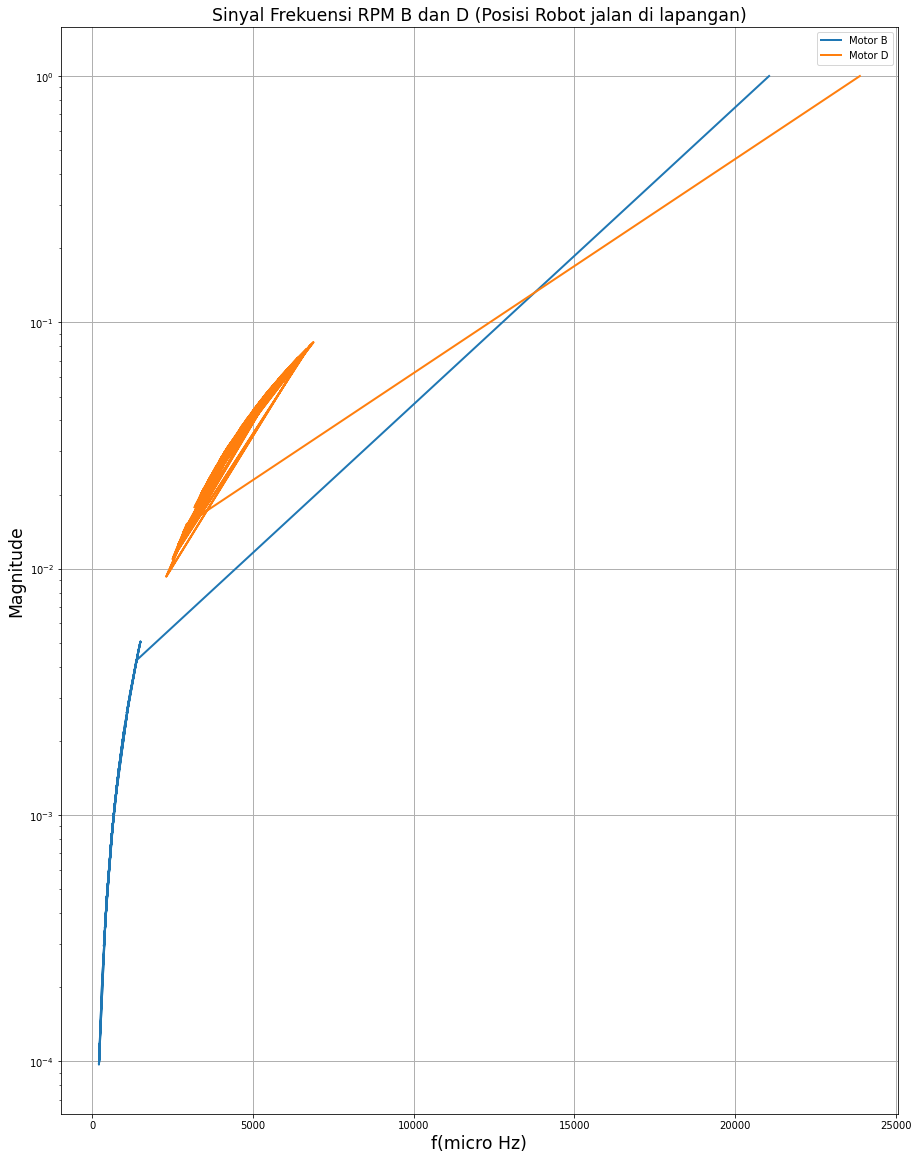

In [ ]:
f_turun_v1=abs(np.fft.fft(df_turun1['RPM B']))
f_turun_v2=abs(np.fft.fft(df_turun1['RPM D']))

# get the list of frequencies
num=np.size(df_turun1['Waktu'])
freq = [i for i in list(range(num))]

# get the list of spectrums
spectrum_v1=f_turun_v1.real*f_turun_v1.real+f_turun_v1.imag*f_turun_v1.imag
nspectrum_v1=spectrum_v1/spectrum_v1[0]

spectrum_v2=f_turun_v2.real*f_turun_v2.real+f_turun_v2.imag*f_turun_v2.imag
nspectrum_v2=spectrum_v2/spectrum_v2[0]
plt.figure(figsize=(15, 20))

plt.grid(visible=True, which='major', axis='both', linestyle='-', linewidth=1)
# plot nspectrum per frequency, with a semilog scale on nspectrum
plt.semilogy(f_turun_v1,nspectrum_v1, linewidth=2, label="Motor B")
plt.semilogy(f_turun_v2,nspectrum_v2, linewidth=2, label="Motor D")
plt.xlabel("f(micro Hz)", fontsize='xx-large')
plt.ylabel("Magnitude", fontsize='xx-large')
plt.title("Sinyal Frekuensi RPM B dan D (Posisi Robot jalan di lapangan)", fontsize='xx-large')
plt.legend()

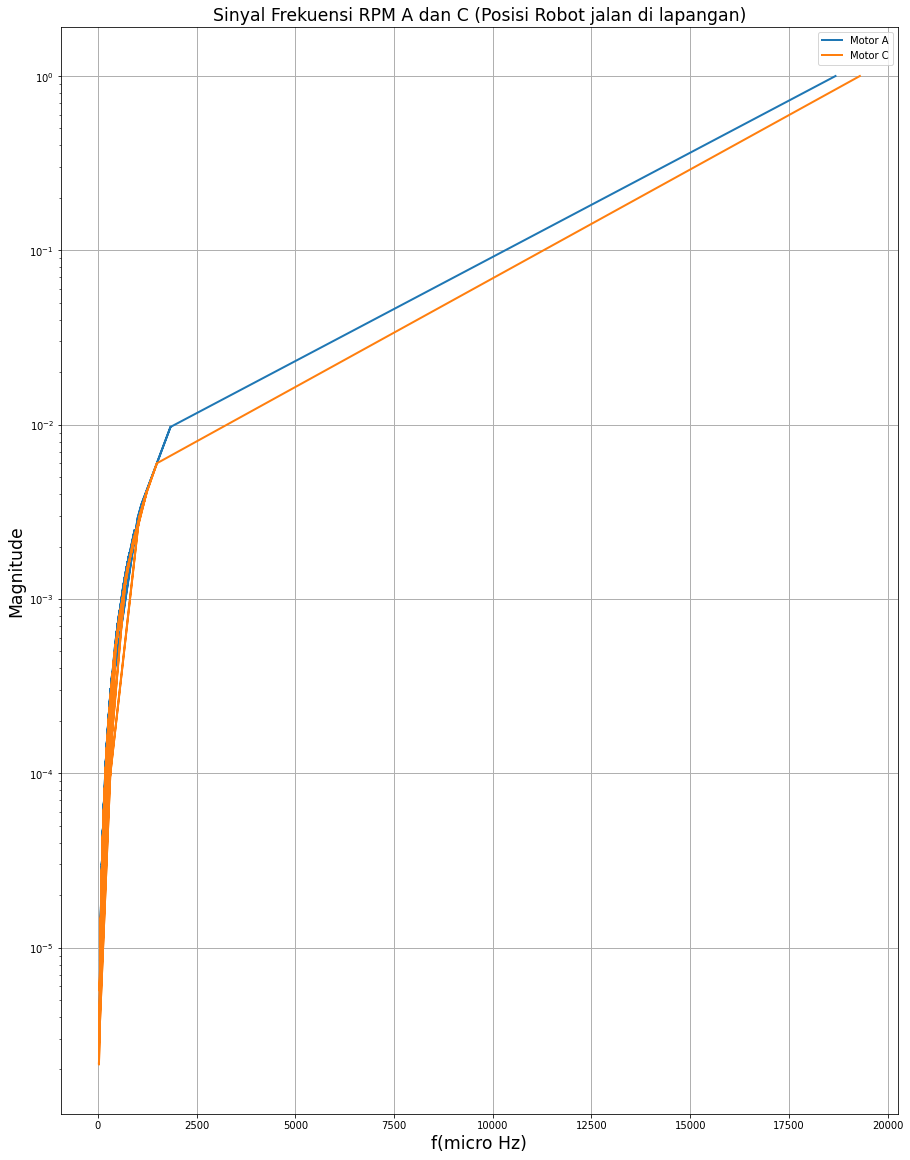

In [ ]:
f_turun_h1=abs(np.fft.fft(df_turun2['RPM A']))
f_turun_h2=abs(np.fft.fft(df_turun2['RPM C']))

# get the list of frequencies
num=np.size(df_turun2['Waktu'])
freq = [i for i in list(range(num))]

# get the list of spectrums
spectrum_h1=f_turun_h1.real*f_turun_h1.real+f_turun_h1.imag*f_turun_h1.imag
nspectrum_h1=spectrum_h1/spectrum_h1[0]

spectrum_h2=f_turun_h2.real*f_turun_h2.real+f_turun_h2.imag*f_turun_h2.imag
nspectrum_h2=spectrum_h2/spectrum_h2[0]
plt.figure(figsize=(15, 20))

plt.grid(visible=True, which='major', axis='both', linestyle='-', linewidth=1)
# plot nspectrum per frequency, with a semilog scale on nspectrum
plt.semilogy(f_turun_h1,nspectrum_h1, linewidth=2, label="Motor A")
plt.semilogy(f_turun_h2,nspectrum_h2, linewidth=2, label="Motor C")
plt.xlabel("f(micro Hz)", fontsize='xx-large')
plt.ylabel("Magnitude", fontsize='xx-large')
plt.title("Sinyal Frekuensi RPM A dan C (Posisi Robot jalan di lapangan)", fontsize='xx-large')
plt.legend()
plt.show()

In [1]:
import scipy
from scipy import signal
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
data = pd.read_csv('/content/maju_4s_2.csv', delimiter=';')
data


,PWM,RPM B,RPM D,Waktu
0,1.0,0.000000,0.000000,37
1,1.0,0.050909,0.080047,29294
2,1.0,0.316079,0.458859,63670
3,1.0,1.004207,1.349215,98056
4,1.0,2.236477,2.818316,132421
...,...,...,...,...
97,1.0,263.283600,270.909180,3828255
98,1.0,263.395508,270.526215,3868880
99,1.0,263.423431,270.051697,3909515
100,1.0,263.369476,269.481689,3950130


In [8]:
df = pd.DataFrame(data)

In [17]:
panjang = len(df['Waktu'])
panjang

102

In [20]:
detik = []

for index in range (0, panjang):
  get_value = (df['Waktu'].iloc[index])/1000000
  detik.append(get_value)

print(detik)

[3.7e-05, 0.029294, 0.06367, 0.098056, 0.132421, 0.167838, 0.203255, 0.238671, 0.27513, 0.31263, 0.35013, 0.38763, 0.42513, 0.462635, 0.500139, 0.53763, 0.57513, 0.61263, 0.65013, 0.68763, 0.72513, 0.76263, 0.80013, 0.83763, 0.87513, 0.91263, 0.95013, 0.988671, 1.027222, 1.066796, 1.10638, 1.147014, 1.18763, 1.228255, 1.26888, 1.309514, 1.35013, 1.390755, 1.43138, 1.472015, 1.51263, 1.553255, 1.593884, 1.634505, 1.67513, 1.715755, 1.756382, 1.797005, 1.83763, 1.878264, 1.91888, 1.959505, 2.00013, 2.040764, 2.08138, 2.122013, 2.162639, 2.203265, 2.24388, 2.284514, 2.32513, 2.365755, 2.40638, 2.447005, 2.48763, 2.528255, 2.56888, 2.609514, 2.65013, 2.690755, 2.73138, 2.772005, 2.81263, 2.853255, 2.89388, 2.934514, 2.97513, 3.015765, 3.05638, 3.097005, 3.137639, 3.178264, 3.21888, 3.259505, 3.30013, 3.340755, 3.381397, 3.422005, 3.46263, 3.503255, 3.54388, 3.584506, 3.62513, 3.665772, 3.70638, 3.747005, 3.78763, 3.828255, 3.86888, 3.909515, 3.95013, 3.990755]


In [21]:
df['Detik'] = detik
df.head(10)

,PWM,RPM B,RPM D,Waktu,Detik
0,1.0,0.000000,0.000000,37,0.000037
1,1.0,0.050909,0.080047,29294,0.029294
2,1.0,0.316079,0.458859,63670,0.063670
3,1.0,1.004207,1.349215,98056,0.098056
4,1.0,2.236477,2.818316,132421,0.132421
5,1.0,3.994876,4.824015,167838,0.167838
6,1.0,6.188033,7.333599,203255,0.203255
7,1.0,8.763192,10.355622,238671,0.238671
8,1.0,11.733231,13.861893,275130,0.275130
9,1.0,15.103137,17.767967,312630,0.312630


Text(0.5, 1.0, 'RPM Motor B dan D (Posisi Robot jalan di lapangan)')

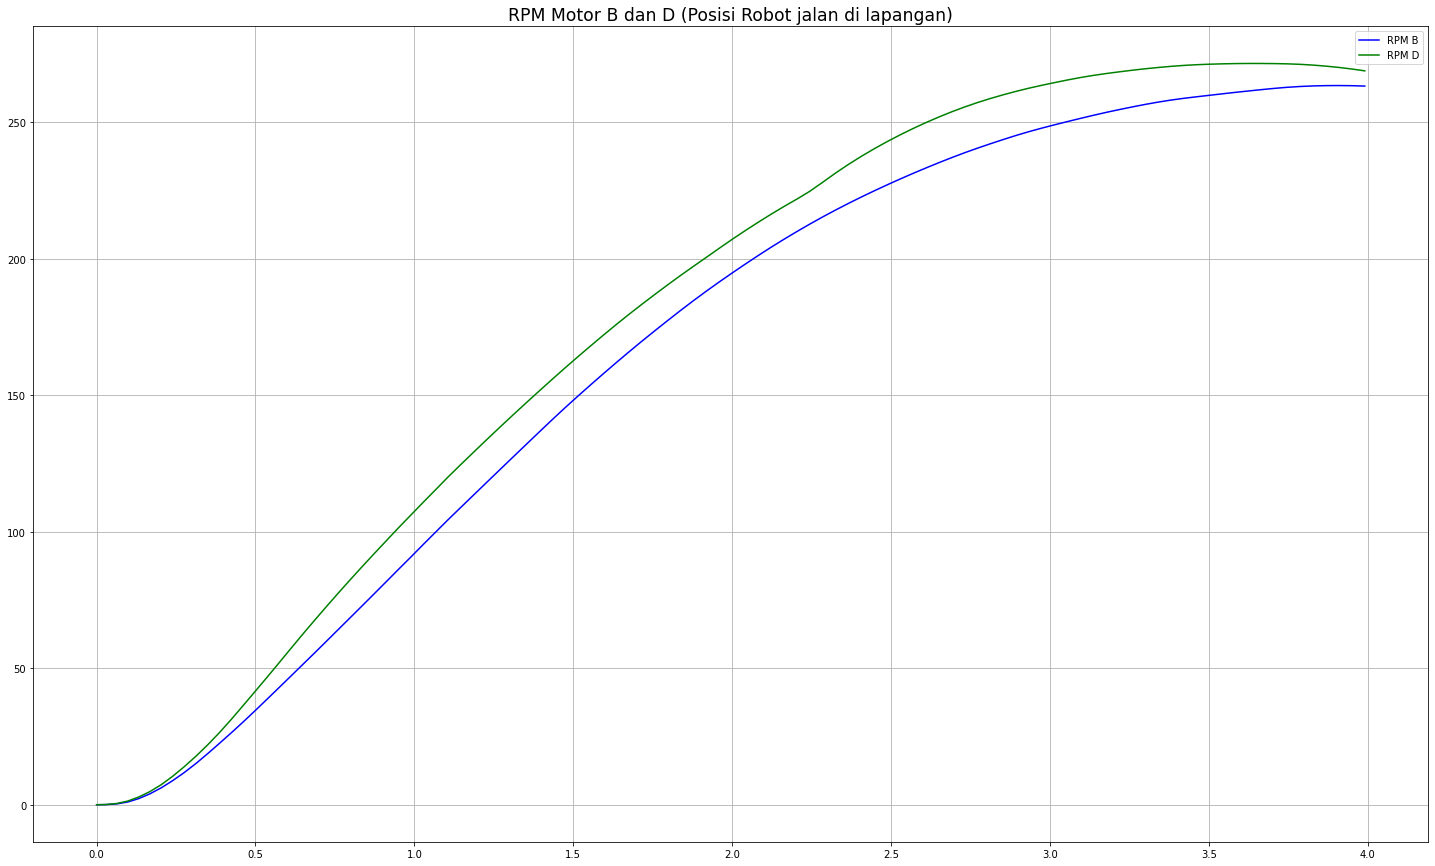

In [22]:
plt.figure(figsize=(25, 15))
plt.grid(visible=True)
plt.plot(df['Detik'], df['RPM B'], color="blue", label="RPM B")
plt.plot(df['Detik'], df['RPM D'], color="green", label="RPM D")
plt.legend()
plt.title("RPM Motor B dan D (Posisi Robot jalan di lapangan)", fontsize='xx-large')

In [24]:
df.to_csv(r'/content/Data Horizontal Filter.csv', index=False)